In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob
import pandas as pd

plt.style.use('ggplot')

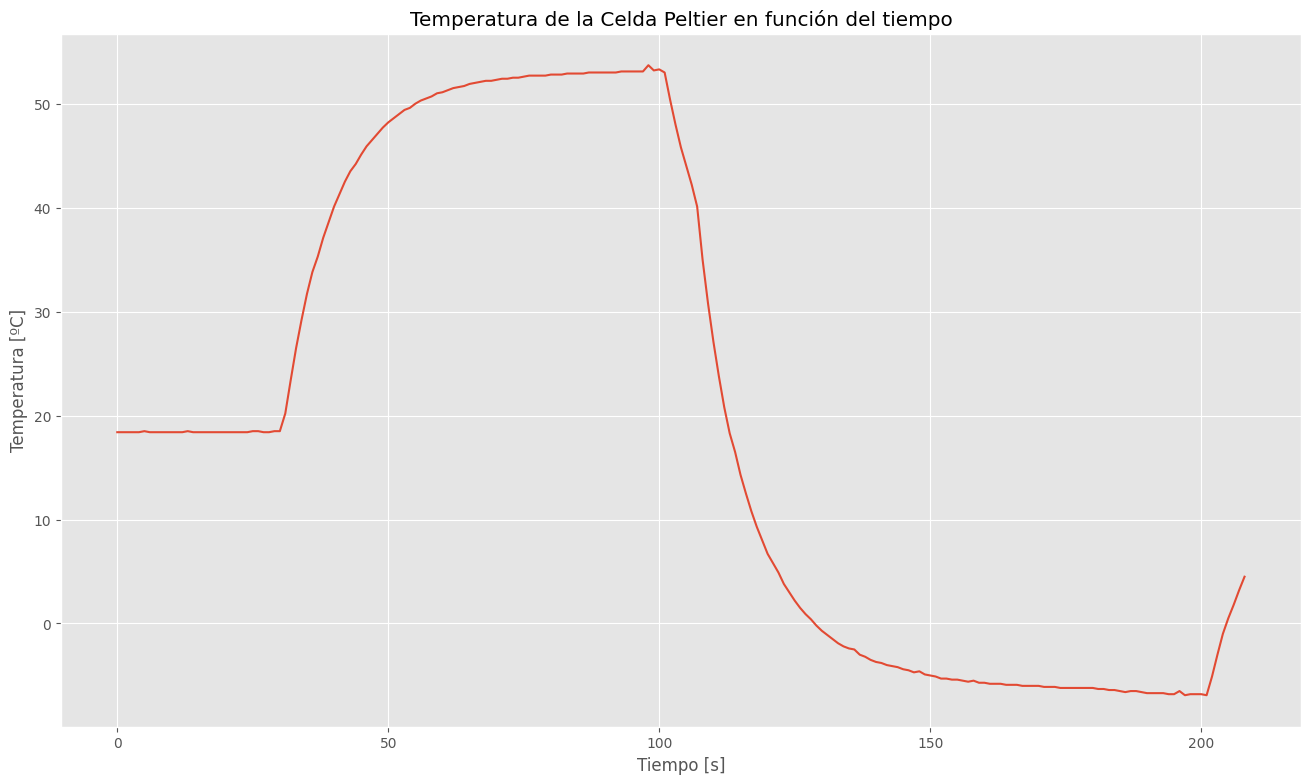

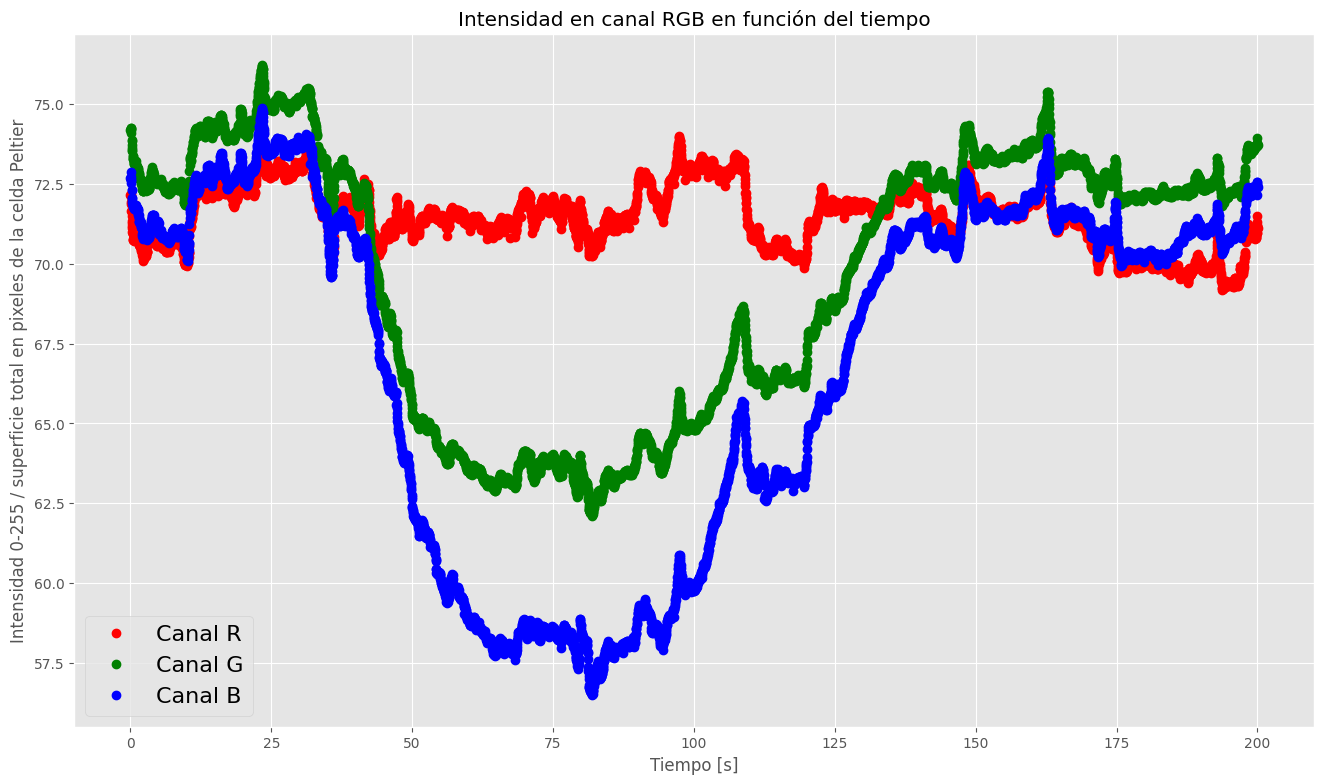

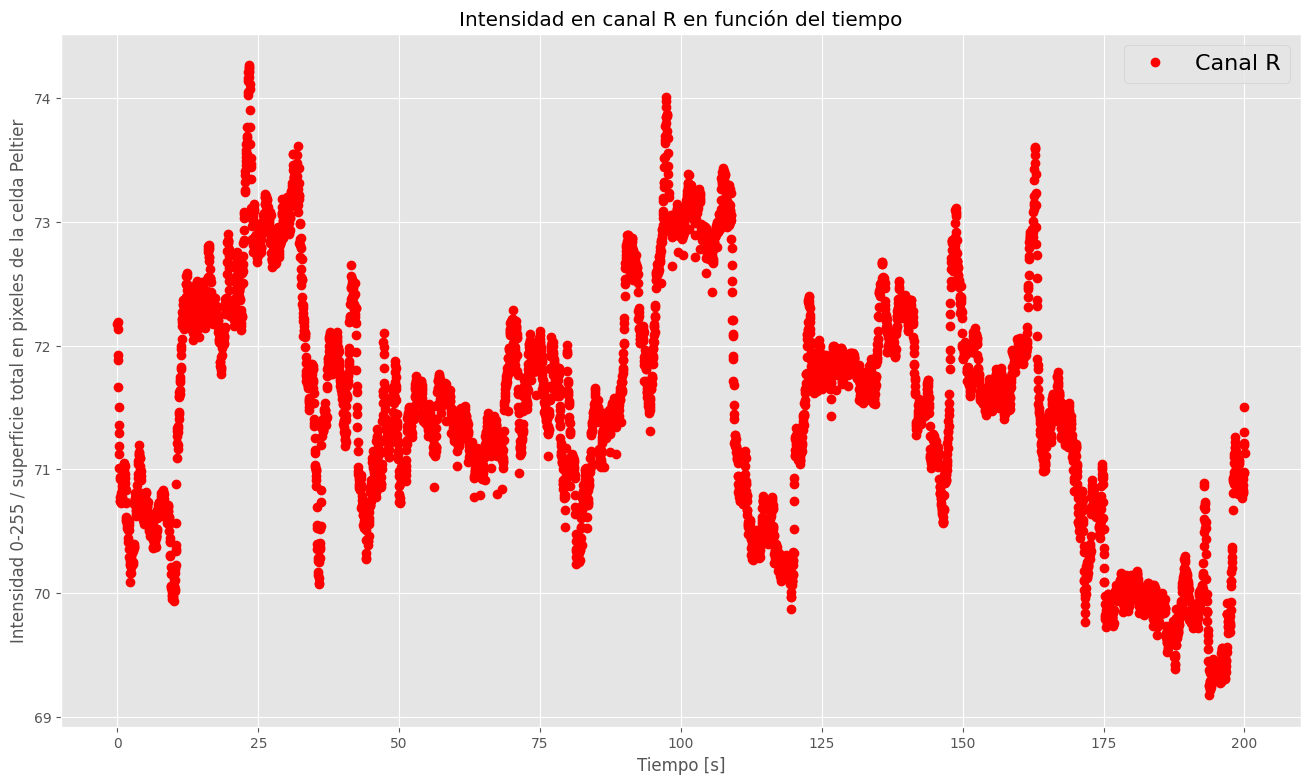

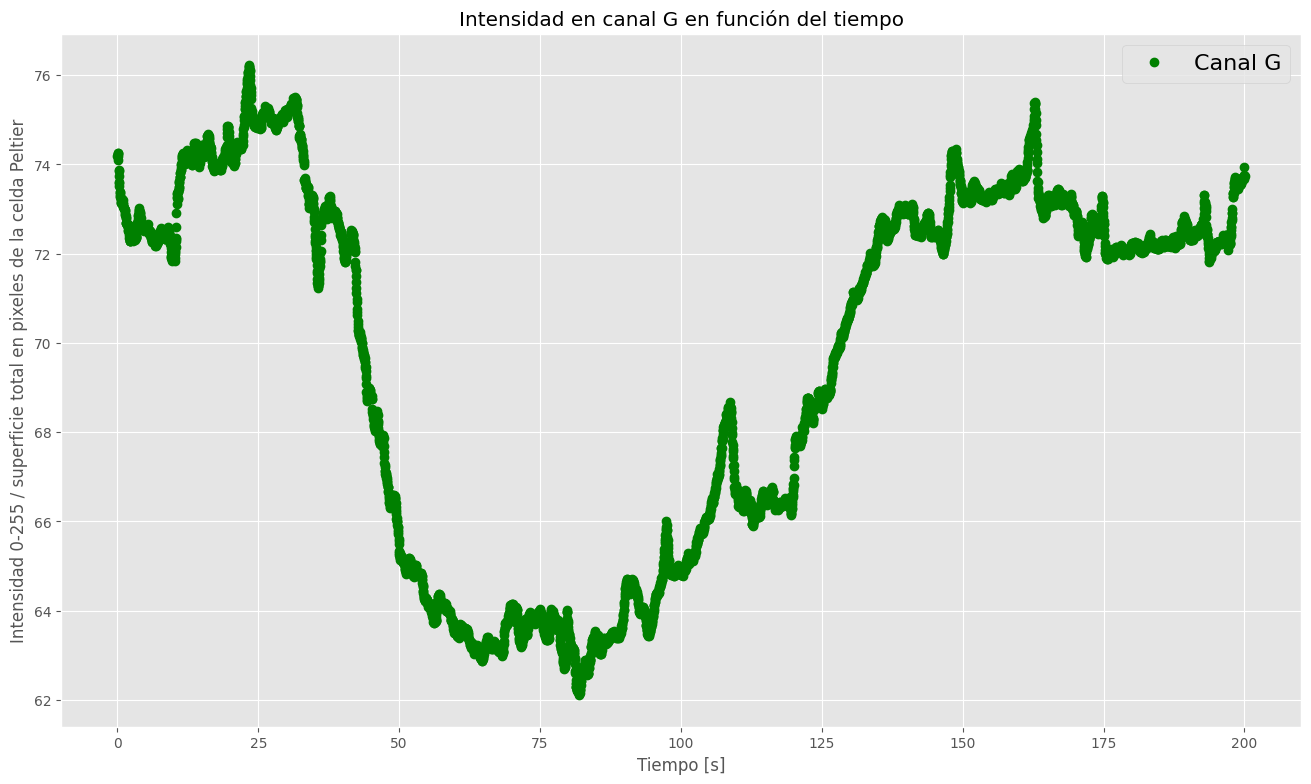

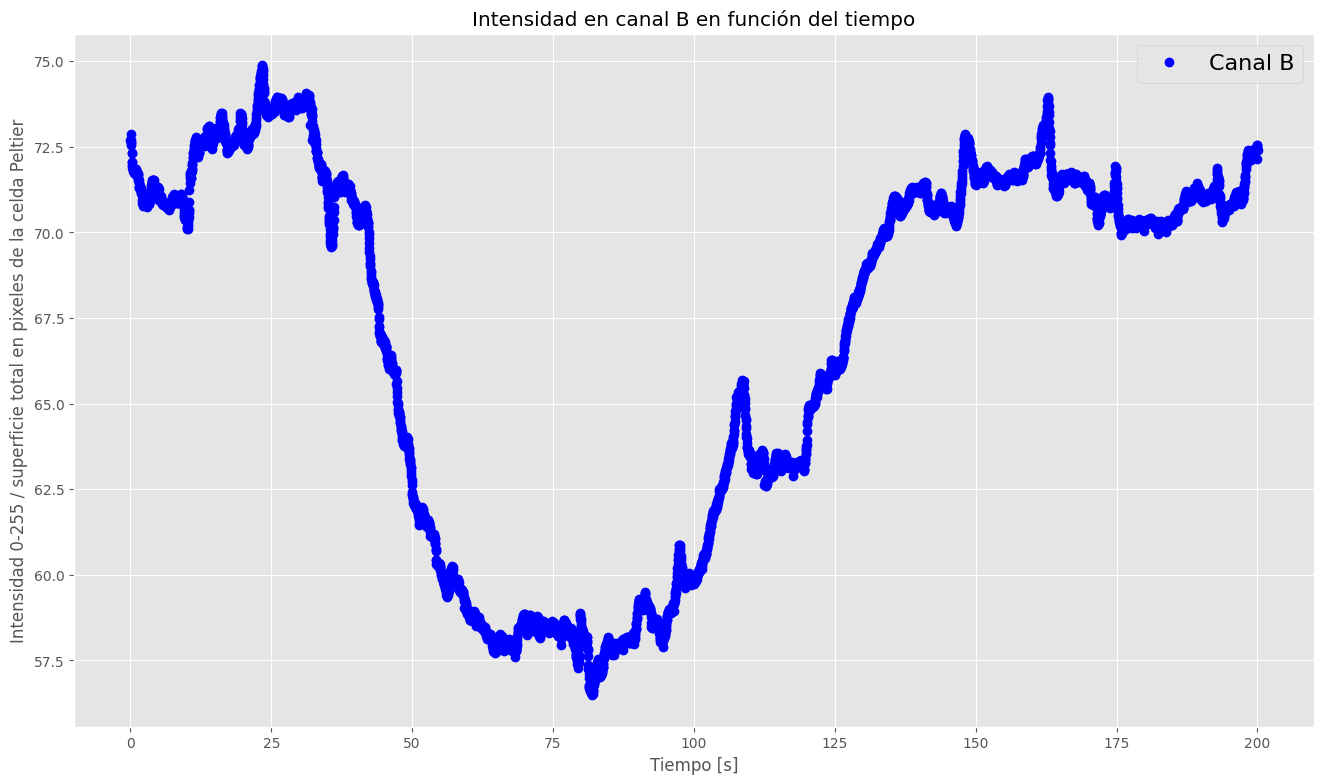

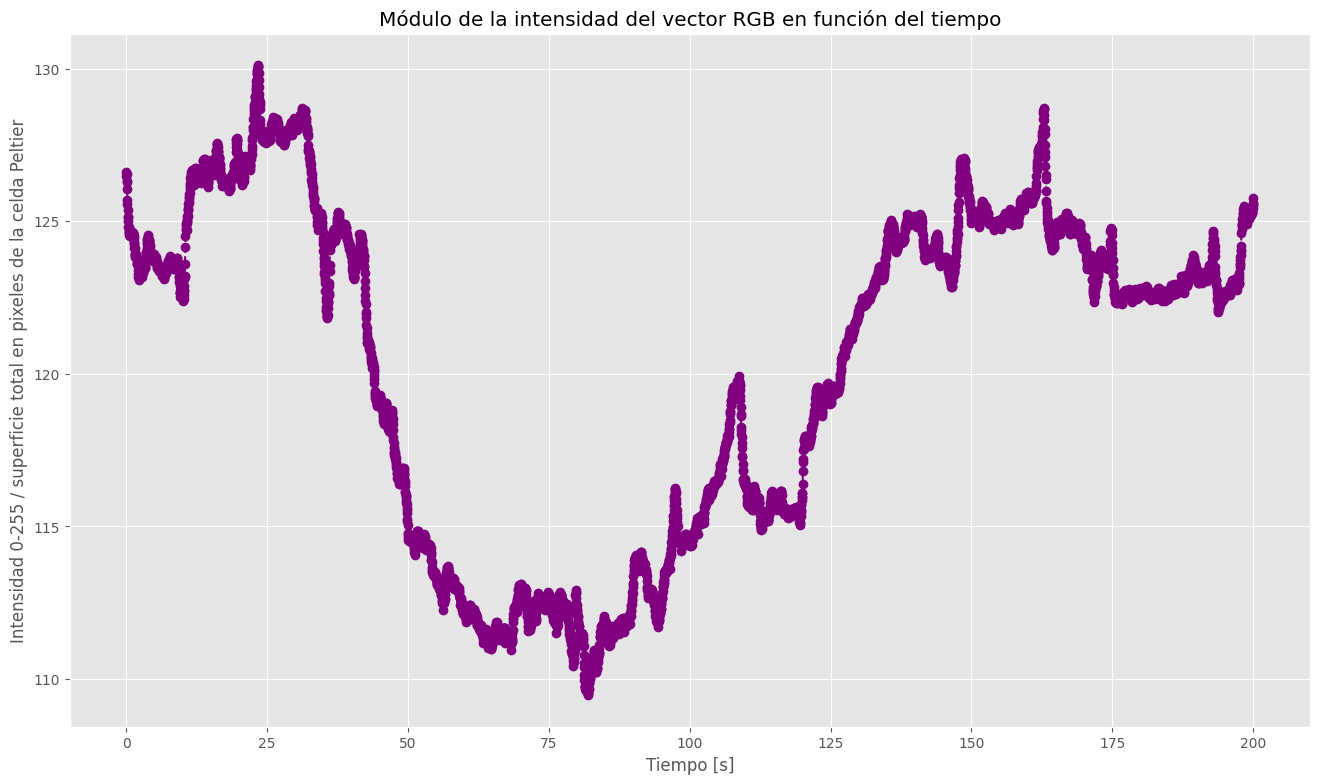

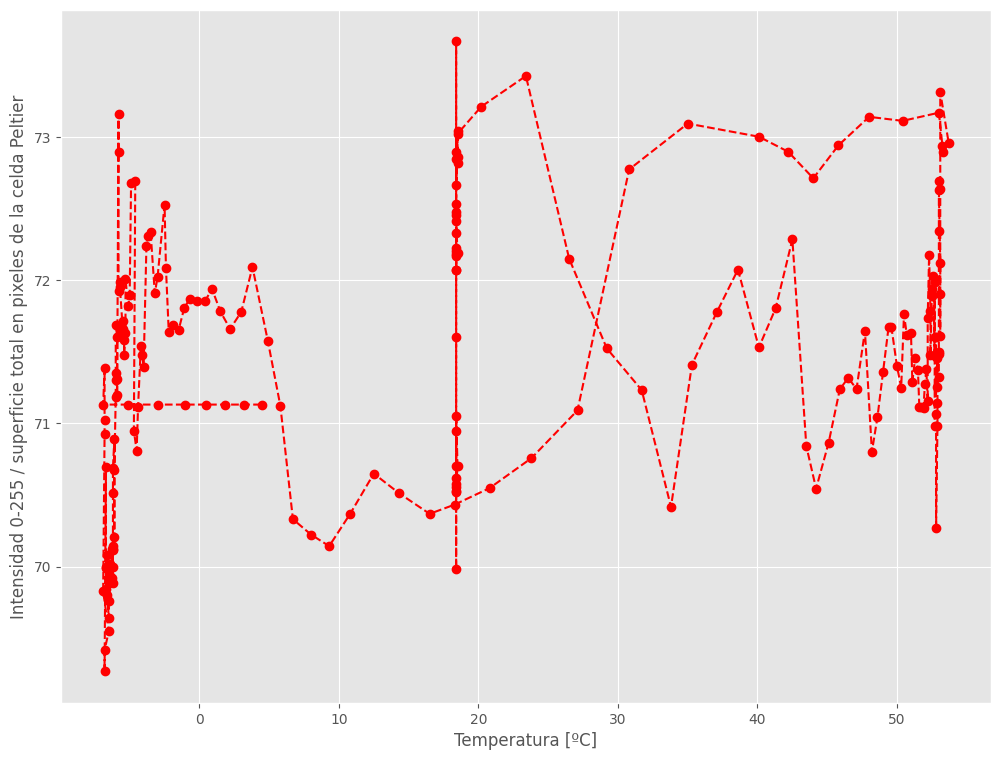

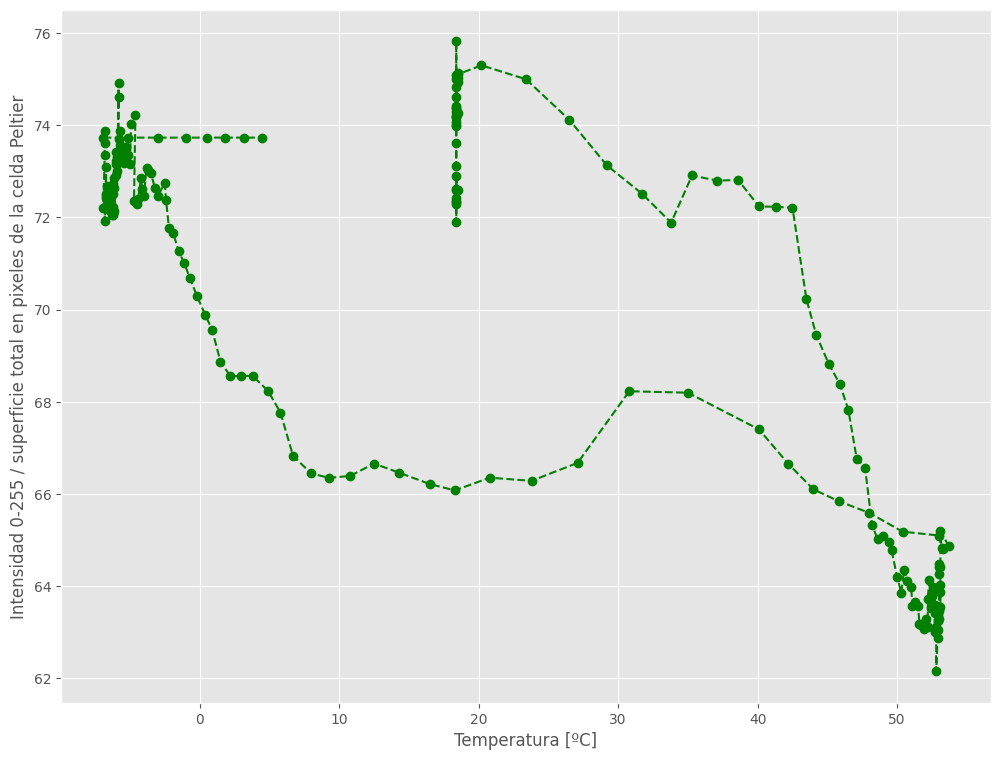

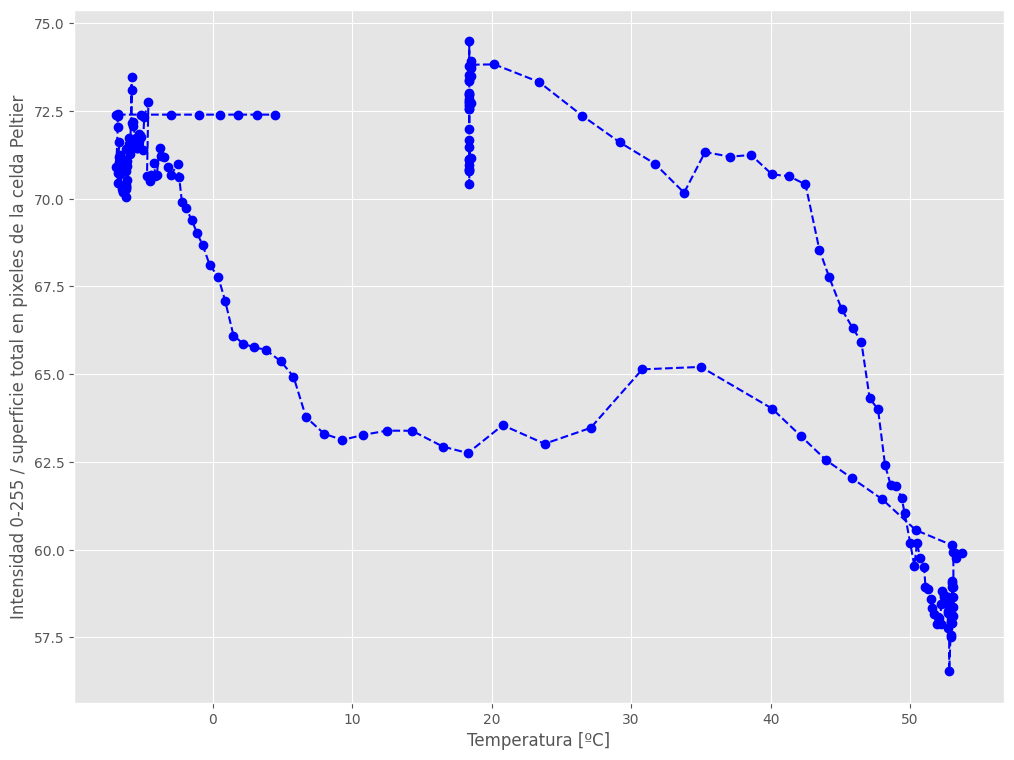

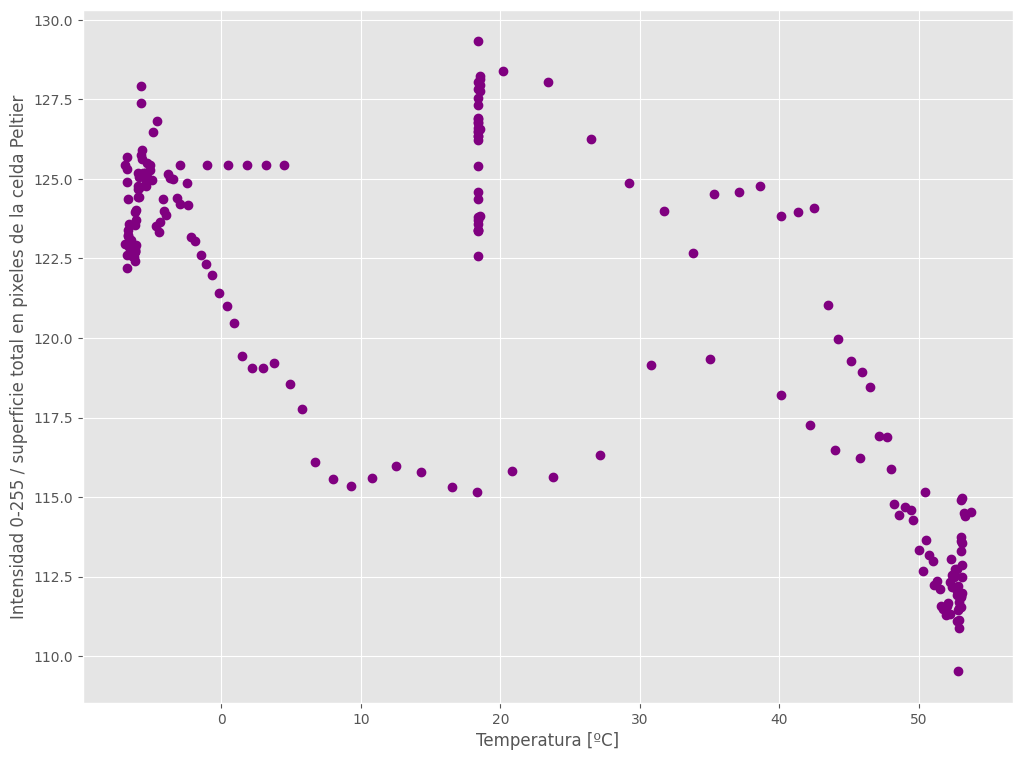

In [ ]:
low=2
high=2
dashdash='--'
for k in range(low,high+1):
    df=pd.read_csv(f'peltier_cosas/peltiermod{k}.csv')

    t=np.array(range(len(df)))

    plt.figure(figsize=(16,9))
    plt.title('Temperatura de la Celda Peltier en función del tiempo',fontsize=24)
    plt.plot(t,df['temp'])
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Temperatura [ºC]')

    df_video=pd.read_csv(f'procesados/video{k}_rgb_sliced.csv')
    intensidad=(df_video['r']**2+df_video['g']**2+df_video['b']**2)**.5

    plt.figure(figsize=(16,9))
    for i in ['r','g','b']:
        plt.plot(df_video['t'],df_video[i],f'{i}o', label=f'Canal {i.upper()}')
        plt.title('Intensidad en canal RGB en función del tiempo',fontsize=24)
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        plt.legend(fontsize=16)
    plt.savefig(f'graficos/video{k}_tiempo_tricolor.png', bbox_inches='tight', dpi=150)
        

    for i in ['r','g','b']:
        plt.figure(figsize=(16,9))
        plt.title(f'Intensidad en canal {i.upper()} en función del tiempo',fontsize=24)
        plt.plot(df_video['t'],df_video[i],f'{i}o', label=f'Canal {i.upper()}')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        plt.legend(fontsize=16)
        plt.savefig(f'graficos/video{k}_tiempo_{i}.png', bbox_inches='tight', dpi=150)


    plt.figure(figsize=(16,9))
    plt.title(f'Módulo de la intensidad del vector RGB en función del tiempo',fontsize=24)
    plt.plot(df_video['t'],intensidad,'o--',color='purple')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
    plt.savefig(f'graficos/video{k}_tiempo_modulo.png', bbox_inches='tight', dpi=150)


    for i in ['r','g','b']:
        y=np.interp(t, df_video['t'], df_video[i])
        plt.figure(figsize=(12,9))
        plt.title(f'Intensidad en canal {i.upper()} en función de la temperatura',fontsize=24)
        plt.plot(df['temp'],y,f'{i}o--',label=f'Intensidad en el canal {i.upper()}')
        plt.xlabel('Temperatura [ºC]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        # plt.plot(df['temp'],y,f'{i}o')
        plt.savefig(f'graficos/video{k}_temperatura_{i}.png', bbox_inches='tight', dpi=150)
        
        
    plt.figure(figsize=(12,9))
    plt.title(f'Módulo de la intensidad del vector RGB en función de la temperatura',fontsize=24)
    plt.xlabel('Temperatura [ºC]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
    y=np.interp(t, df_video['t'], intensidad)
    plt.plot(df['temp'],y, 'o',color='purple')
    plt.savefig(f'graficos/video{k}_temperatura_modulo.png', bbox_inches='tight', dpi=150)
    y=0
